In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings

In [2]:
os.getcwd()


'C:\\Users\\Neeraj\\sabudh'

In [3]:
train =pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [5]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [43]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [6]:
train_original = train.copy()
test_original = test.copy()

In [8]:
train.shape

(18288, 3)

In [9]:
test.shape

(5112, 2)

In [13]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y  %H:%M'  )

In [14]:
test['Datetime'] =  pd.to_datetime(test.Datetime, format = '%d-%m-%Y  %H:%M'  )

In [15]:
train_original['Datetime'] =  pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y  %H:%M'  )
test_original['Datetime'] =  pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y  %H:%M'  )

In [20]:
train


,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [34]:
for i in (train,test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [35]:
i

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


In [37]:
train['day of week'] = train['Datetime'].dt.dayofweek

In [39]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [40]:
def applyer(x):
    if x.dayofweek == 5 or x.dayofweek == 6:
        return 1 
    else :
        return 0

temp2= train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [42]:
train

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0


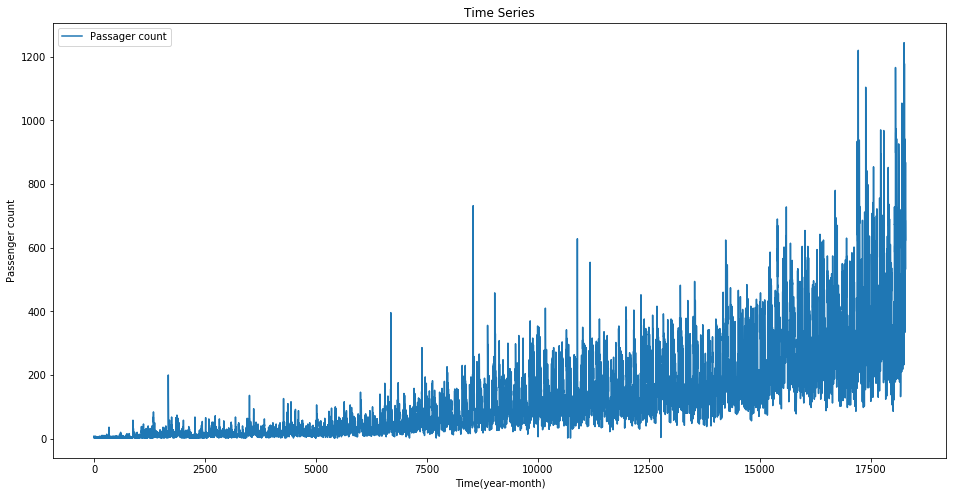

In [47]:
train_index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize= (16,8))
plt.plot(ts, label = 'Passager count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc = 'best')

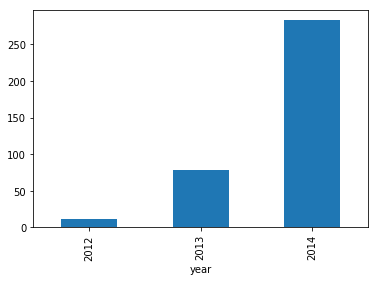

In [54]:
train.groupby('year')['Count'].mean().plot.bar()

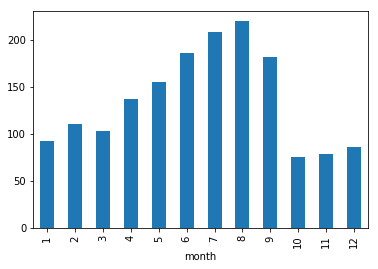

In [55]:
train.groupby('month')['Count'].mean().plot.bar()

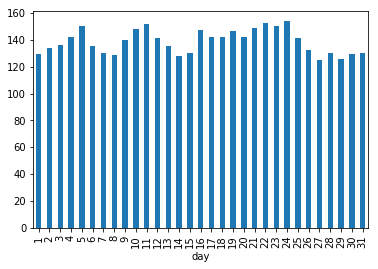

In [56]:
train.groupby('day')['Count'].mean().plot.bar()

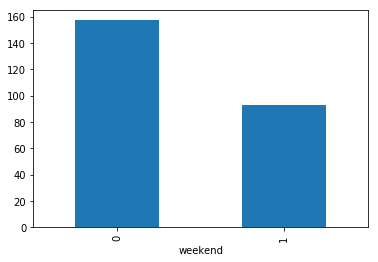

In [57]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [59]:
temp = train.groupby(['year', 'month'])['Count'].mean()

In [60]:
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

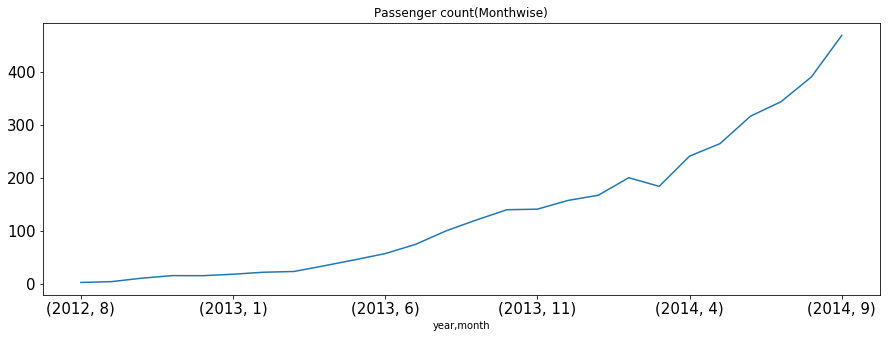

In [62]:
temp.plot(figsize = (15,5), title = "Passenger count(Monthwise)", fontsize= 15)

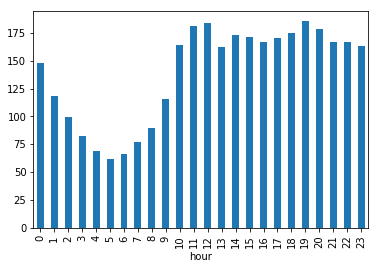

In [63]:
train.groupby('hour')['Count'].mean().plot.bar()